In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, Concatenate, RepeatVector, Dot
from tensorflow.keras.layers import Input, Embedding, Bidirectional, Dropout
from tensorflow.keras.models import Model, Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
#Here i am using yelp review dataset  
review_path = r'C:\Users\deept\OneDrive\Desktop\sentiment_git\sentiment_analysis\yelp_dataset\yelp_academic_dataset_review.json'
size = 200000
review  = pd.read_json(review_path, lines = True, nrows = size)

In [3]:
review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [4]:
review.shape

(200000, 9)

In [5]:
df_review = review[['text', 'stars']]

In [6]:
df_review.head()

,text,stars
0,"If you decide to eat here, just be aware it is...",3
1,I've taken a lot of spin classes over the year...,5
2,Family diner. Had the buffet. Eclectic assortm...,3
3,"Wow! Yummy, different, delicious. Our favo...",5
4,Cute interior and owner (?) gave us tour of up...,4


In [7]:
df_review.info() #no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    200000 non-null  object
 1   stars   200000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


In [8]:
df_review.describe()

,stars
count,200000.000000
mean,3.841425
std,1.357044
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [9]:
df_train, df_test = train_test_split(df_review, test_size = 0.02)

In [10]:
df_train.text.apply(lambda x: len(x.split(" "))).mean()

102.40227040816326

In [11]:
tokenizer = Tokenizer(oov_token = "OOv")
tokenizer.fit_on_texts(df_train['text'])
word_indexs = tokenizer.word_index

In [12]:
word_indexs

{'OOv': 1,
 'the': 2,
 'and': 3,
 'a': 4,
 'i': 5,
 'to': 6,
 'was': 7,
 'of': 8,
 'is': 9,
 'it': 10,
 'for': 11,
 'in': 12,
 'my': 13,
 'we': 14,
 'with': 15,
 'that': 16,
 'but': 17,
 'this': 18,
 'they': 19,
 'on': 20,
 'you': 21,
 'had': 22,
 'have': 23,
 'not': 24,
 'were': 25,
 'food': 26,
 'so': 27,
 'are': 28,
 'good': 29,
 'at': 30,
 'place': 31,
 'great': 32,
 'be': 33,
 'as': 34,
 'very': 35,
 'there': 36,
 'all': 37,
 'our': 38,
 'out': 39,
 'if': 40,
 'here': 41,
 'me': 42,
 'service': 43,
 'just': 44,
 'like': 45,
 'time': 46,
 'one': 47,
 'get': 48,
 'from': 49,
 'their': 50,
 'back': 51,
 'when': 52,
 'or': 53,
 'would': 54,
 'go': 55,
 "it's": 56,
 'an': 57,
 'up': 58,
 'really': 59,
 'which': 60,
 'about': 61,
 'will': 62,
 'also': 63,
 'been': 64,
 'some': 65,
 'what': 66,
 'no': 67,
 'only': 68,
 'more': 69,
 'your': 70,
 'she': 71,
 'nice': 72,
 'can': 73,
 'us': 74,
 'got': 75,
 'by': 76,
 'best': 77,
 'he': 78,
 'because': 79,
 'well': 80,
 'them': 81,
 'even': 

In [13]:
vocab_size = len(word_indexs)

In [14]:
tokenized_train = tokenizer.texts_to_sequences(df_train['text'])
tokenized_test = tokenizer.texts_to_sequences(df_test['text'])

In [15]:
padding_type = 'post'
truncating_type = 'post'
Tx = 110 # since avg words in sentence is 102.38

In [16]:
x_train = pad_sequences(tokenized_train, maxlen = Tx, padding = padding_type, truncating = truncating_type)
x_test = pad_sequences(tokenized_test, maxlen = Tx, padding = padding_type, truncating = truncating_type)
y_train = df_train['stars']
y_test = df_test['stars']

In [17]:
yoh_train = pd.get_dummies(y_train, dtype = 'int32')
yoh_test = pd.get_dummies(y_test, dtype = 'int32')

In [18]:
print(f"shape of x_train: {x_train.shape}")
print(f"shape of x_test: {x_test.shape}")
print(f"shape of y_train: {y_train.shape}")
print(f"shape of y_test: {y_test.shape}")
print(f"shape of yoh_train: {yoh_train.shape}")
print(f"shape of yoh_test: {yoh_test.shape}")

shape of x_train: (196000, 110)
shape of x_test: (4000, 110)
shape of y_train: (196000,)
shape of y_test: (4000,)
shape of yoh_train: (196000, 5)
shape of yoh_test: (4000, 5)


In [19]:
x_train

array([[   5,  174,   13, ...,    0,    0,    0],
       [  14,   22,    4, ...,    0,    0,    0],
       [  13,  721,   94, ...,    0,    0,    0],
       ...,
       [5293,   18,  184, ...,    0,    0,    0],
       [  32,   26,    3, ...,    0,    0,    0],
       [   5, 1715,   15, ...,   85,    0,    0]])

## Predicting number of Stars

In [20]:
n_a = 32
n_s = 64
embed_size = 128
repeator = RepeatVector(Tx)
concatenator = Concatenate(axis = -1)
densor1 = Dense(32, activation = 'relu')
dotor = Dot(axes = 1)

In [21]:
def one_step_attention(a, s_prev):
    s_prev = repeator(s_prev)
    cat = concatenator([a, s_prev])
    e = densor1(cat)
    drop_out = Dropout(.4)(e)
    alphas = tf.keras.activations.softmax(drop_out, axis = -1)
    context = dotor([alphas, a])
    
    return context

In [22]:
post_LSTM_cell = LSTM(n_s, return_state = True)
output_layer_star = Dense(5, activation = 'softmax')

In [23]:
def modelf(Tx, n_a, n_s, vacab_size, embed_size):
    sequence_input = Input(shape = (Tx, ), dtype = 'int32')
    embedded_sequences = Embedding(vocab_size+1, embed_size)(sequence_input)

    s0 = Input(shape = (n_s, ), name = 's0')
    c0 = Input(shape = (n_s, ), name = 'c0')
    s = s0
    c = c0

    a = Bidirectional(LSTM(units = n_a, return_sequences = True))(embedded_sequences)

    context = one_step_attention(a, s)
    _, s, c = post_LSTM_cell(context, initial_state = [s, c])
    out = output_layer_star(s)
    model = Model(inputs = [sequence_input, s0, c0], outputs = out)
    return model

In [24]:
model1 = modelf(Tx, n_a, n_s, vocab_size, embed_size)

In [25]:
model1.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 110)               │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding (Embedding)         │ (None, 110, 128)          │      12,950,144 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ s0 (InputLayer)               │ (None, 64)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bidirectional (Bidirectional) │ (None, 110, 64)           │          41,216 │ embedding[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ repeat_vector (RepeatVector)  │ (None, 110, 64)           │               0 │ s0[0][0]                   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 110, 128)          │               0 │ bidirectional[0][0],       │
│                               │                           │                 │ repeat_vector[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 110, 32)           │           4,128 │ concatenate[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 110, 32)           │               0 │ dense[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ softmax (Softmax)             │ (None, 110, 32)           │               0 │ dropout[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dot (Dot)                     │ (None, 32, 64)            │               0 │ softmax[0][0],             │
│                               │                           │                 │ bidirectional[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ c0 (InputLayer)               │ (None, 64)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm (LSTM)                   │ [(None, 64), (None, 64),  │          33,024 │ dot[0][0], s0[0][0],       │
│                               │ (None, 64)]               │                 │ c0[0][0]                   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1 (Dense)               │ (None, 5)                 │             325 │ lstm[0][1]                 │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 13,028,837 (49.70 MB)

 Trainable params: 13,028,837 (49.70 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model1.compile(loss = 'CategoricalCrossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [27]:
s0 = np.zeros((len(x_train), n_s))
c0 = np.zeros((len(x_train), n_s))
s0_test = np.zeros((len(x_test), n_s))
c0_test = np.zeros((len(x_test), n_s))

In [28]:
BATCH_SIZE = 100
EPOCHS = 3
history = model1.fit([x_train, s0,c0],yoh_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=([x_test, s0_test, c0_test], yoh_test))

Epoch 1/3
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 258s 128ms/step - accuracy: 0.5903 - loss: 0.9686 - val_accuracy: 0.6480 - val_loss: 0.8199
Epoch 2/3
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 249s 127ms/step - accuracy: 0.6912 - loss: 0.7217 - val_accuracy: 0.6622 - val_loss: 0.8109
Epoch 3/3
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 246s 126ms/step - accuracy: 0.7426 - loss: 0.6152 - val_accuracy: 0.6472 - val_loss: 0.8613


In [29]:
y_pred = model1.predict([x_test, s0_test, c0_test])

125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step


In [30]:
y_star = np.argmax(y_pred, axis = 1) + 1
y_star

array([1, 5, 4, ..., 4, 5, 4], dtype=int64)

In [31]:
sum = np.sum(y_star == y_test)

In [32]:
acc = sum/len(y_test)
acc

0.64725

(array([ 479.,    0.,  272.,    0.,    0.,  462.,    0., 1144.,    0.,
        1643.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

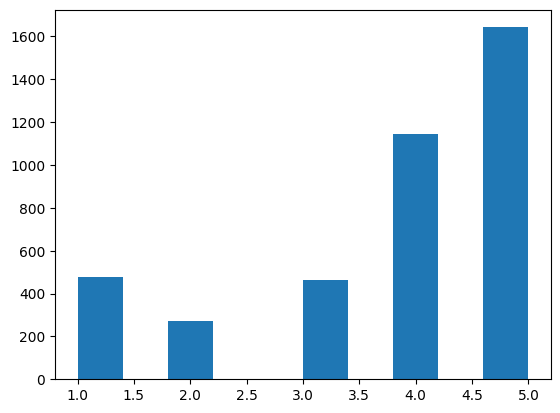

In [33]:
plt.hist(y_star)

(array([ 452.,    0.,  351.,    0.,    0.,  467.,    0.,  996.,    0.,
        1734.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

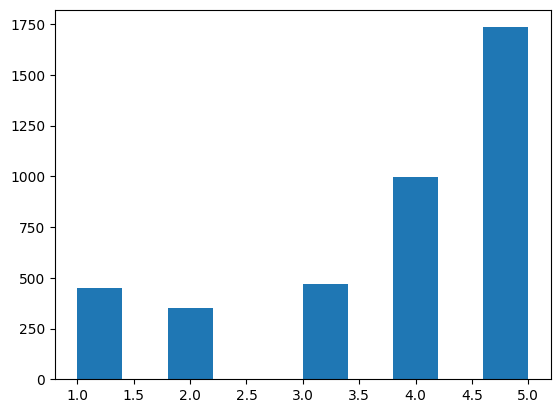

In [34]:
plt.hist(y_test)

## Binary classification (positive or negative)

In [35]:
y_train_sentiment = np.where(y_train > 3, 1, 0)
y_test_sentiment = np.where(y_test > 3, 1, 0)

In [36]:
output_layer_sentiment = Dense(1, activation = 'sigmoid')

In [37]:
def modelf_2(Tx, n_a, n_s, vacab_size, embed_size):
    sequence_input = Input(shape = (Tx, ), dtype = 'int32')
    embedded_sequences = Embedding(vocab_size+1, embed_size)(sequence_input)

    s0 = Input(shape = (n_s, ), name = 's0')
    c0 = Input(shape = (n_s, ), name = 'c0')
    s = s0
    c = c0

    a = Bidirectional(LSTM(units = n_a, return_sequences = True))(embedded_sequences)

    context = one_step_attention(a, s)
    _, s, c = post_LSTM_cell(context, initial_state = [s, c])
    out = output_layer_sentiment(s)
    model = Model(inputs = [sequence_input, s0, c0], outputs = out)
    return model

In [38]:
model2 = modelf_2(Tx, n_a, n_s, vocab_size, embed_size)

In [39]:
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [40]:
model2.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 110)               │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_1 (Embedding)       │ (None, 110, 128)          │      12,950,144 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ s0 (InputLayer)               │ (None, 64)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bidirectional_1               │ (None, 110, 64)           │          41,216 │ embedding_1[0][0]          │
│ (Bidirectional)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ repeat_vector (RepeatVector)  │ (None, 110, 64)           │               0 │ s0[0][0]                   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 110, 128)          │               0 │ bidirectional_1[0][0],     │
│                               │                           │                 │ repeat_vector[1][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 110, 32)           │           4,128 │ concatenate[1][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 110, 32)           │               0 │ dense[1][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ softmax_1 (Softmax)           │ (None, 110, 32)           │               0 │ dropout_1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dot (Dot)                     │ (None, 32, 64)            │               0 │ softmax_1[0][0],           │
│                               │                           │                 │ bidirectional_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ c0 (InputLayer)               │ (None, 64)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm (LSTM)                   │ [(None, 64), (None, 64),  │          33,024 │ dot[1][0], s0[0][0],       │
│                               │ (None, 64)]               │                 │ c0[0][0]                   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_2 (Dense)               │ (None, 1)                 │              65 │ lstm[1][1]                 │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 13,028,577 (49.70 MB)

 Trainable params: 13,028,577 (49.70 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
BATCH_SIZE = 100
EPOCHS = 3
history = model2.fit([x_train, s0,c0],y_train_sentiment,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=([x_test, s0_test, c0_test], y_test_sentiment))

Epoch 1/3
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 256s 128ms/step - accuracy: 0.8629 - loss: 0.3188 - val_accuracy: 0.8965 - val_loss: 0.2443
Epoch 2/3
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 244s 124ms/step - accuracy: 0.9254 - loss: 0.1875 - val_accuracy: 0.9020 - val_loss: 0.2473
Epoch 3/3
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 247s 126ms/step - accuracy: 0.9470 - loss: 0.1371 - val_accuracy: 0.8982 - val_loss: 0.2702


In [42]:
y_pred = model2.predict([x_test, s0_test, c0_test])
prediction = (y_pred >= 0.5)

125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step


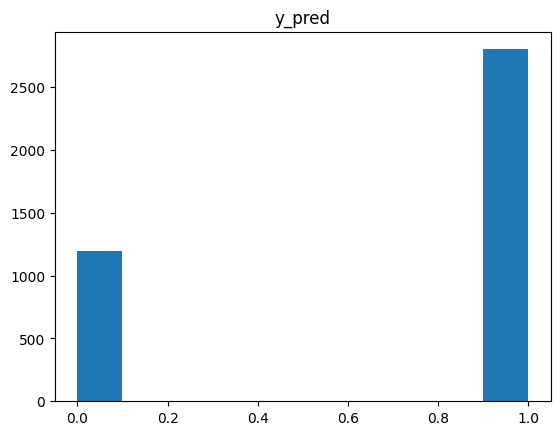

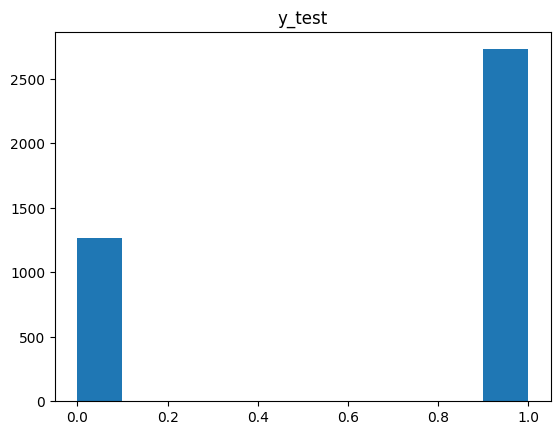

In [43]:
plt.hist(prediction.astype(float))
plt.title("y_pred")
plt.show()

plt.hist(y_test_sentiment)
plt.title("y_test")
plt.show()

In [44]:
sum = np.sum(y_test_sentiment.astype(int).reshape(-1,1) == prediction.astype(int).reshape(-1,1))

In [45]:
acc = sum/len(prediction)
acc

0.89825